### Part 1

In [1]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

Example training data:
    
- An experimental drug was tested on people aged b/w 13-100
- Trial has 2100 participants, half were under 65
- 95% patients above 65 experienced side effects
- 95% patients under 65 had no side effects

In [3]:
for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)
    
for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)    

In [4]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

/Users/akshay/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


### Part 2

In [6]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

/Users/akshay/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


In [7]:
#model.add(l3)
model = Sequential([
    Dense(16, input_shape=(1,) , activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax'),
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [9]:
history = model.fit(scaled_train_samples, 
                    train_labels, 
                    validation_split = 0.1, 
                    batch_size = 5, 
                    epochs = 20, 
                    shuffle = True, 
                    verbose = 2)

Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 0s - loss: 0.7205 - acc: 0.3995 - val_loss: 0.6945 - val_acc: 0.4905
Epoch 2/20
 - 0s - loss: 0.6365 - acc: 0.6783 - val_loss: 0.7035 - val_acc: 0.4810
Epoch 3/20
 - 0s - loss: 0.5689 - acc: 0.7714 - val_loss: 0.7171 - val_acc: 0.4952
Epoch 4/20
 - 0s - loss: 0.5050 - acc: 0.8323 - val_loss: 0.7437 - val_acc: 0.5190
Epoch 5/20
 - 0s - loss: 0.4278 - acc: 0.8714 - val_loss: 0.7885 - val_acc: 0.5286
Epoch 6/20
 - 0s - loss: 0.3435 - acc: 0.9275 - val_loss: 0.8613 - val_acc: 0.5333
Epoch 7/20
 - 0s - loss: 0.2833 - acc: 0.9471 - val_loss: 0.9434 - val_acc: 0.5286
Epoch 8/20
 - 0s - loss: 0.2386 - acc: 0.9656 - val_loss: 1.0429 - val_acc: 0.5286
Epoch 9/20
 - 0s - loss: 0.2052 - acc: 0.9704 - val_loss: 1.1429 - val_acc: 0.5286
Epoch 10/20
 - 0s - loss: 0.1798 - acc: 0.9762 - val_loss: 1.2427 - val_acc: 0.5286
Epoch 11/20
 - 0s - loss: 0.1606 - acc: 0.9757 - val_loss: 1.3350 - val_acc: 0.5333
Epoch 12/20
 - 0s - loss: 0.1451 - acc

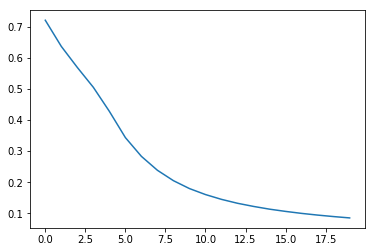

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

df = pd.DataFrame(history.history)

#scaler = MinMaxScaler()
#df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df['loss'].plot.line()

### Predict

In [12]:
test_labels = []
test_samples = []

In [13]:
for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)
    
for i in range(200):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)    

In [14]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

In [15]:
scaled_test_samples = scaler.transform((test_samples).reshape(-1,1))

In [16]:
predictions = model.predict(scaled_test_samples,batch_size=10,verbose=0)

In [17]:
rounded_predictions = model.predict_classes(scaled_test_samples,batch_size=10,verbose=0)

### Confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix
import itertools

In [20]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [22]:
cm_df = pd.DataFrame(cm, index=['no_side_effects','has_side_effects'], columns=['no_side_effects','has_side_effects'])

In [23]:
cm_df

,no_side_effects,has_side_effects
no_side_effects,10,200
has_side_effects,191,19
